# Customer Decision Prediction

In [ ]:
Name:Moinuddin Farooqui
PRN:71930775K
School: School of Data Science
Program: Machine Learning and AI Analyst
Batch: ML6
Module Name: Python Programming
Module Code: ML06 

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import data
df=pd.read_csv("data of customer.csv")
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [ ]:
df.tail()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
24995,24996,Odisha,37,Salaried,Low,2018,No,5460,No
24996,24997,Maharashtra,46,Self employed,Medium,2016,No,8408,No
24997,24998,Delhi,44,Self employed,High,2015,No,6336,No
24998,24999,Maharashtra,53,Self employed,High,2012,NaN,8402,Yes
24999,25000,Uttarakhand,68,,Medium,2014,No,7716,No


In [ ]:
df.shape

(25000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               25000 non-null  int64 
 1   STATE            25000 non-null  object
 2   AGE              25000 non-null  int64 
 3   OCCUPATION       25000 non-null  object
 4   INCOME_GROUP     25000 non-null  object
 5   CUSTOMER_SINCE   25000 non-null  int64 
 6   LOYALTY_PROGRAM  22038 non-null  object
 7   PAST_PURCHASE    25000 non-null  int64 
 8   PURCHASE         25000 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


# Attrribute information

1.ID - Unique identifier of a customer,
2.STATE - Customer's state of residence,
3.AGE - Customer's age,
4.OCCUPATION - Customer's occupation,
5.INCOME_GROUP - Customer's income band,
6.CUSTOMER_SINCE - Year in which the customer made the first purchase at the store,
7.LOYALTY_PROGRAM - Is the customer enrolled for the loyalty program?,
8.PAST_PURCHASE - Total amount of past purchase from the same store,
9.PURCHASE - Target variable

# Objective
 Predict whether a customer will purchase from the store given data about customer’s information and past behaviour

# Data Cleaning

In [ ]:
df.isna().sum()

ID                    0
STATE                 0
AGE                   0
OCCUPATION            0
INCOME_GROUP          0
CUSTOMER_SINCE        0
LOYALTY_PROGRAM    2962
PAST_PURCHASE         0
PURCHASE              0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
columns=df.columns

In [ ]:
for i in columns:
    df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,0,31,4,0,2,10,0,9349,0
1,11111,17,3,2,2,10,0,658,0
2,17223,33,38,0,1,5,2,12758,1
3,18334,28,3,2,2,10,0,2973,1
4,19445,31,16,3,1,7,0,2253,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


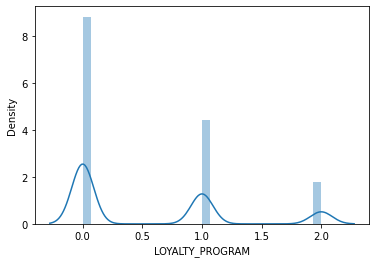

In [ ]:
sns.distplot(df.LOYALTY_PROGRAM)

In [ ]:
df.LOYALTY_PROGRAM.median()

0.0

In [ ]:
df.fillna(df.median())

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,0,31,4,0,2,10,0,2045,0
1,1,17,3,2,2,10,0,7069,0
2,2,33,38,0,1,5,2,5273,1
3,3,28,3,2,2,10,0,9359,1
4,4,31,16,3,1,7,0,8647,0
5,5,18,4,2,2,10,0,2246,0
6,6,28,44,0,1,2,2,8407,1
7,7,18,21,3,3,10,0,2122,0
8,8,33,32,3,3,6,1,4102,0
9,9,28,43,0,1,2,1,12547,1


In [ ]:
df.isna().sum()

ID                 0
STATE              0
AGE                0
OCCUPATION         0
INCOME_GROUP       0
CUSTOMER_SINCE     0
LOYALTY_PROGRAM    0
PAST_PURCHASE      0
PURCHASE           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               25000 non-null  int64
 1   STATE            25000 non-null  int64
 2   AGE              25000 non-null  int64
 3   OCCUPATION       25000 non-null  int64
 4   INCOME_GROUP     25000 non-null  int64
 5   CUSTOMER_SINCE   25000 non-null  int64
 6   LOYALTY_PROGRAM  25000 non-null  int64
 7   PAST_PURCHASE    25000 non-null  int64
 8   PURCHASE         25000 non-null  int64
dtypes: int64(9)
memory usage: 1.7 MB


In [ ]:
df.describe()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12499.500000,19.643840,19.703520,1.818720,1.953960,7.521520,0.531280,7623.203200,0.236480
std,7217.022701,9.395239,14.826609,1.237545,0.801365,2.670592,0.697138,4171.848333,0.424929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6249.750000,13.000000,6.000000,0.000000,1.000000,5.000000,0.000000,3792.000000,0.000000
50%,12499.500000,18.000000,19.000000,2.000000,2.000000,9.000000,0.000000,8570.500000,0.000000
75%,18749.250000,28.000000,30.000000,3.000000,3.000000,10.000000,1.000000,11174.000000,0.000000
max,24999.000000,33.000000,61.000000,3.000000,3.000000,11.000000,2.000000,13913.000000,1.000000


# visuallization

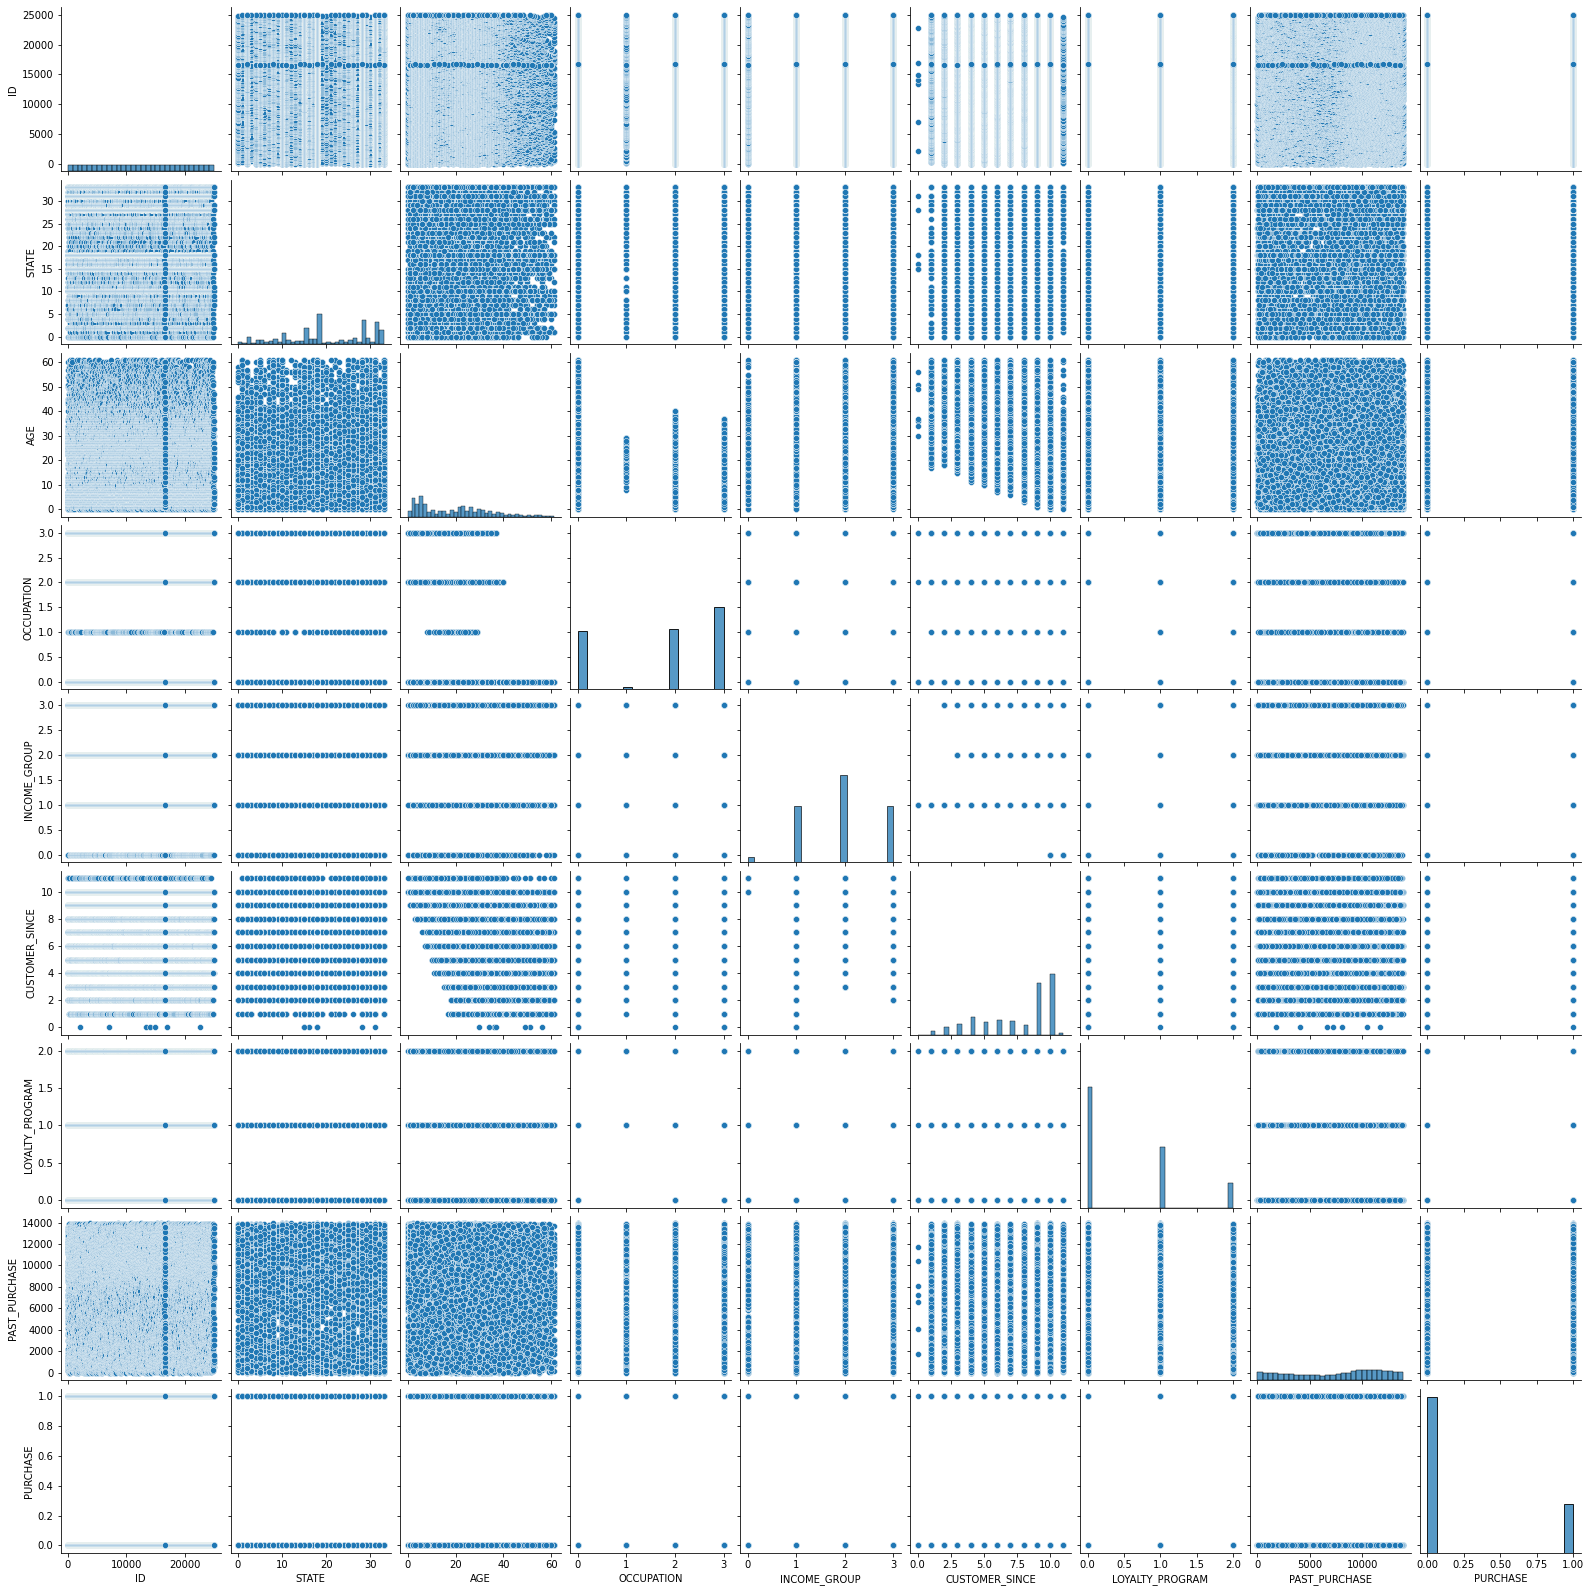

In [ ]:
sns.pairplot(data=df)

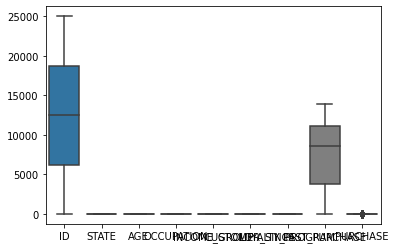

In [ ]:
sns.boxplot(data=df)

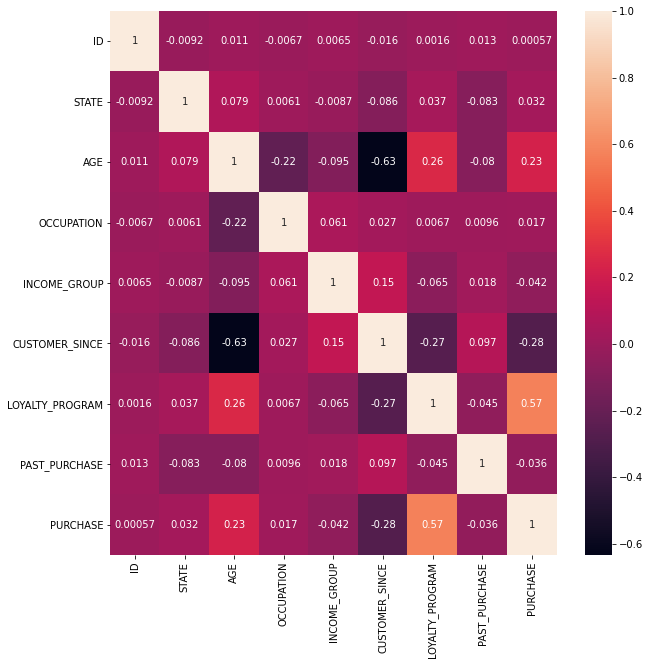

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# conclusion:
        we can see that ,there is no highly correlation between variables.

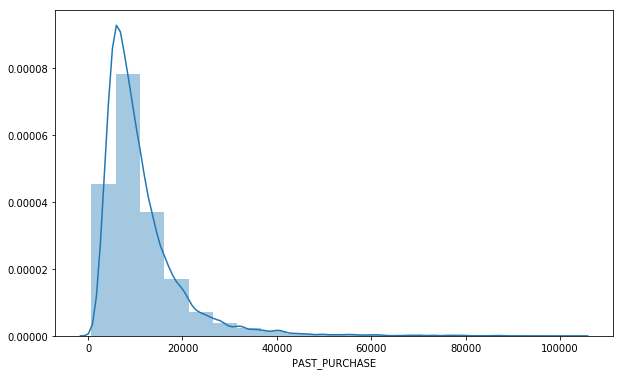

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['PAST_PURCHASE'],bins=20)

# conclusion:
    from this graph we see that,more customer purchase total amount is maximum 20000.
    

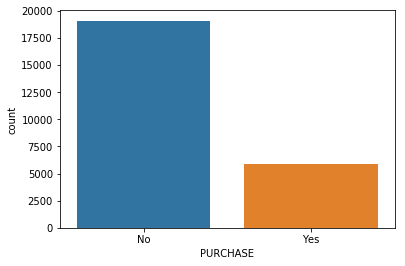

In [ ]:
sns.countplot(data=df,x='PURCHASE')

# conclusion:
       From past data we conclude that ,more customer does not purchases product from this store.

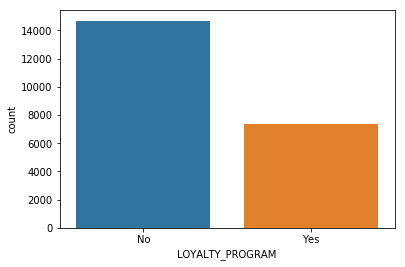

In [ ]:
sns.countplot(data=df,x='LOYALTY_PROGRAM')

# conclusion:
      From this graph , we see that more customer doesn't enrolled for the loyalty program. 

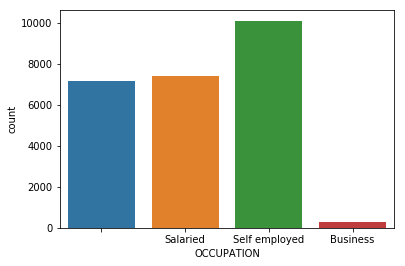

In [ ]:
sns.countplot(data=df,x='OCCUPATION')

# conclusion:
    From this plot,we see that Self Employed people Purchase more than other.

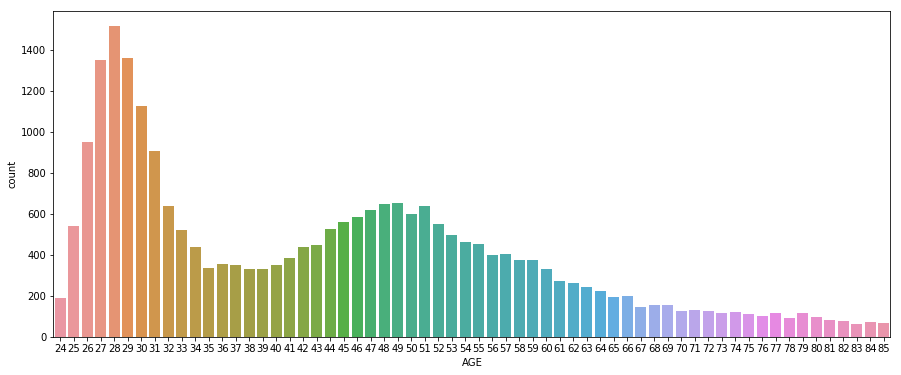

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='AGE')

# conclusion:

      Insight of dataset shows that People of age group between 26 to 32 are heavy buyers.

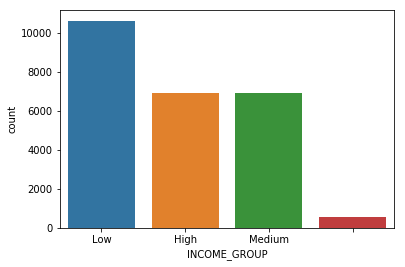

In [ ]:
sns.countplot(data=df,x='INCOME_GROUP')

# conclusion:
      from above plot,Person having low income Prefer to buy items from This Store.

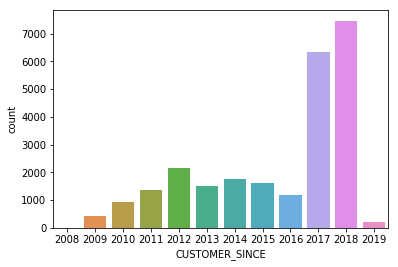

In [ ]:
sns.countplot(data=df,x='CUSTOMER_SINCE')

# conclusion:
        From above plot, we see that in year 2017 and 2018 more customer made the first purchase at the store.

# classification

In [ ]:
#import liberaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [ ]:
#Define dependent and independent variable.
x=df.drop(["PURCHASE"],axis=1)
y=df["PURCHASE"]

In [ ]:
#split the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Prepare multiple models
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC()
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "BaggingClassifier":BaggingClassifier(),"XGBClassifier":XGBClassifier()}

In [ ]:
#Function for training the multiple models and generating accuracy¶
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


In [ ]:
acc=modelAccuracy(models,x,y,0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Accuracy for  LogisticRegression  is : 0.8384
The Accuracy for  DecisionTreeClassifier  is : 0.7842
The Accuracy for  SVM  is : 0.7606
The Accuracy for  KNN  is : 0.7106
The Accuracy for  GNB  is : 0.8406
The Accuracy for  RandomForestClassifier  is : 0.855
The Accuracy for  AdaBoostClassifier  is : 0.8564
The Accuracy for  GradientBoostingClassifier  is : 0.8598
The Accuracy for  BaggingClassifier  is : 0.8466
The Accuracy for  XGBClassifier  is : 0.8614


In [ ]:
#Best Model
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)

In [ ]:
acc

{'AdaBoostClassifier': 0.8564,
 'BaggingClassifier': 0.8466,
 'DecisionTreeClassifier': 0.7842,
 'GNB': 0.8406,
 'GradientBoostingClassifier': 0.8598,
 'KNN': 0.7106,
 'LogisticRegression': 0.8384,
 'RandomForestClassifier': 0.855,
 'SVM': 0.7606,
 'XGBClassifier': 0.8614}

In [ ]:
bestModel(acc)

Best model is  XGBClassifier  with Accuracy  0.8614


In [ ]:
#Best Parameter
def bestParameter(model,params,x,y):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring="accuracy")
    res=grid_cv.fit(x,y)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)
    

In [ ]:
model=XGBClassifier()
params={"learning_rate":[0.05,0.1,0.3,0.5,1],"max_depth":[1,3],"n_estimators":[10,50,100]}
bestParameter(model,params,xtrain,ytrain)

Best Parameters are  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy is  0.8583999999999998


In [ ]:
#Retraining The model using best parameters
model=XGBClassifier(learning_rate=0.1, max_depth=3,n_estimators= 100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.8614
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      3803
           1       0.88      0.49      0.63      1197

    accuracy                           0.86      5000
   macro avg       0.87      0.73      0.77      5000
weighted avg       0.86      0.86      0.85      5000



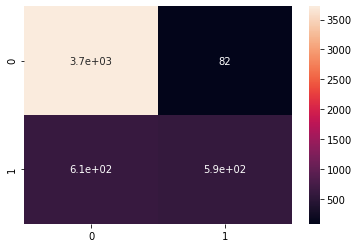

In [ ]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

# Conclusion:
    For this data, XGBClassifier is the Best fitted Model with Accuracy 86.14%.